In [ ]:
#Script from Bastiaan Dekker, 1/11/21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage.filters
import scipy.signal
import matplotlib as mpl
mpl.style.use('seaborn-white')
import seaborn as sns
import scipy.ndimage
from numpy import diff

In [2]:
#input_df = pd.read_table("/nl/umw_job_dekker/users/bd44w/DCIC/walks_ns_with_nas.tsv", sep="\t")

In [3]:
input_df = pd.read_table("/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/walks/210111_exp4.30and4.39_AllSamples_directints.txt", sep = "\t")

In [4]:
input_df.head()

,pacbio_frag_ID,class,steps,max_span,sum_dists,V1,V2,V3,V4,V5,...,number_of_non_unique_ranges,number_of_unique_ranges,first_frag_compartment_type,first_frag_compartment_index,second_frag_compartment_type,second_frag_compartment_index,ratio_80kb,ratio_100kb,ratio_120kb,full_dataset_ID
0,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,10234212,10234975,chr6,6992083,...,6,6,NaN,NaN,NaN,NaN,40.530563,32.42445,27.020375,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30
1,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,6992083,6992530,chr6,3680843,...,6,6,NaN,NaN,NaN,NaN,41.385663,33.10853,27.590442,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30
2,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,3680843,3681677,chr6,10236219,...,6,6,NaN,NaN,NaN,NaN,81.937600,65.55008,54.625067,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30
3,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,10236219,10236685,chr6,10237655,...,6,6,NaN,NaN,NaN,NaN,0.028625,0.02290,0.019083,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30
4,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,10237655,10238975,chr6,3660814,...,6,6,NaN,NaN,NaN,NaN,82.217187,65.77375,54.811458,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30


In [5]:
input_df.columns

Index(['pacbio_frag_ID', 'class', 'steps', 'max_span', 'sum_dists', 'V1', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'size', 'state', 'dataset', 'treatment',
       'biorep', 'techrep', 'fully_mapped', 'dist', 'inter_chr', 'direction',
       'unique_reduced_ranges', 'number_of_non_unique_ranges',
       'number_of_unique_ranges', 'first_frag_compartment_type',
       'first_frag_compartment_index', 'second_frag_compartment_type',
       'second_frag_compartment_index', 'ratio_80kb', 'ratio_100kb',
       'ratio_120kb', 'full_dataset_ID'],
      dtype='object')

In [6]:
input_df.dataset.unique()

array(['TI_MC3C_Dpn_t2_4_30', 'TI_MC3C_Dpn_t2_4_39',
       'TI_MC3C_Dpn_t4DMSO_4_30', 'TI_MC3C_Dpn_t4DMSO_4_39',
       'TI_MC3C_Dpn_t4ICRF_4_30', 'TI_MC3C_Dpn_t4ICRF_4_39',
       'TI_MC3C_Dpn_t8DMSO_4_30', 'TI_MC3C_Dpn_t8DMSO_4_39',
       'TI_MC3C_Dpn_t8ICRF_4_30', 'TI_MC3C_Dpn_t8ICRF_4_39',
       'TI_MC3C_Dpn_t0Mit_4_30_T1', 'TI_MC3C_Dpn_t0Mit_4_30_T2',
       'TI_MC3C_Dpn_t0Mit_4_39'], dtype=object)

In [7]:
def direct_cis_interactions(df1):
    df2 = df1[(df1["V1"] != "chrX")] # I always remove X for scaling but this is optional you can include them
    df3 = df2[(df2["V1"] != "chrY")]
    df4 = df3[(df3["V1"] == df3["V4"])]
    return df4

In [8]:
cis_df = direct_cis_interactions(input_df)

In [9]:
cis_df.head()

,pacbio_frag_ID,class,steps,max_span,sum_dists,V1,V2,V3,V4,V5,...,number_of_non_unique_ranges,number_of_unique_ranges,first_frag_compartment_type,first_frag_compartment_index,second_frag_compartment_type,second_frag_compartment_index,ratio_80kb,ratio_100kb,ratio_120kb,full_dataset_ID
0,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,10234212,10234975,chr6,6992083,...,6,6,NaN,NaN,NaN,NaN,40.530563,32.42445,27.020375,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30
1,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,6992083,6992530,chr6,3680843,...,6,6,NaN,NaN,NaN,NaN,41.385663,33.10853,27.590442,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30
2,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,3680843,3681677,chr6,10236219,...,6,6,NaN,NaN,NaN,NaN,81.937600,65.55008,54.625067,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30
3,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,10236219,10236685,chr6,10237655,...,6,6,NaN,NaN,NaN,NaN,0.028625,0.02290,0.019083,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30
4,anaphase_TI_MC3C_Dpn_t2_4_30_all_100008265,1,5,6577375.0,19687971.0,chr6,10237655,10238975,chr6,3660814,...,6,6,NaN,NaN,NaN,NaN,82.217187,65.77375,54.811458,anaphase t2 R1 T1 TI_MC3C_Dpn_t2_4_30


# Parts of scaling script to run it locally

In [10]:
def bedslice(grouped, chrom, start, end):
	"""Assumes no proper nesting of intervals"""
	chromdf = grouped.get_group(chrom)
	lo = chromdf['end'].values.searchsorted(start, side='right')
	hi = lo + chromdf['start'].values[lo:].searchsorted(end, side='left')
	return chromdf.iloc[lo:hi]


def intlogbins(start, end, N=None, ratio=None):
	
	start = int(start)
	end = int(end)
	if ratio is not None:
		if N is not None:
			raise ValueError("Please specify only N or ratio")
		N = np.log(end / start) / np.log(ratio)
	elif N is None:
		raise ValueError("Please specify either N or ratio")
	bins = np.logspace(np.log10(start), np.log10(end), N)
	bins = np.array(np.rint(bins), dtype=int)
	for i in range(1,len(bins)-1):
		if bins[i]==bins[i-1]:
			bins[i] = bins[i]+1
	assert np.all(bins[1:] > bins[:-1])
	assert bins[0] == start
	assert bins[-1] == end
	return bins


def geomprog(factor, start=1):
	yield start
	while True:
		start *= factor
		yield start


def _geomrange(start, end, factor, endpoint):
	prev = np.nan
	for i in geomprog(factor, start):
		x = int(round(i))
		
		if x > end:
			break

		if x == prev:
			continue
		
		prev = x
		yield x

	if endpoint and prev != end:
		yield end


def geomrange(start, end, factor, endpoint=False):
	return np.fromiter(_geomrange(start, end, factor, endpoint), dtype=int)


def geomspace(start, end, num=50, endpoint=True):
	factor = 1 + ((np.log10(end) - np.log10(start)) / num)
	return geomrange(start, end, factor, endpoint=endpoint)


def _contact_areas(distbins, scaffold_length):
	distbins = distbins.astype(float)
	scaffold_length = float(scaffold_length)
	outer_areas = np.maximum(scaffold_length - distbins[:-1], 0) ** 2
	inner_areas = np.maximum(scaffold_length - distbins[1: ], 0) ** 2
	return 0.5 * (outer_areas - inner_areas)
	

def contact_areas(distbins, region1, region2):
	if region1 == region2:
		start, end = region1
		areas = _contact_areas(distbins, end - start)
	else:
		start1, end1 = region1
		start2, end2 = region2
		if start2 <= start1:
			start1, start2 = start2, start1
			end1, end2 = end2, end1
		areas = (
			_contact_areas(distbins, end2 - start1) -
			_contact_areas(distbins, start2 - start1) -
			_contact_areas(distbins, end2 - end1)
		)
		if end1 < start2:
			areas += _contact_areas(distbins, start2 - end1)
	
	return areas

In [11]:
def scaling_on_go(input_df):
    chromosomes=list(chr_sizes.index[:-3])
    
    input_df["pos1"] = ((input_df["V2"] + input_df["V3"]) /2).astype("int32")
    input_df["pos2"] = ((input_df["V5"] + input_df["V6"]) /2).astype("int32")
    df = input_df.rename(columns={"V1" : 'chrom1', 'V4' : 'chrom2'})
    
    chrom_out = {}
    chrom_obs = {}

    for chrom in chromosomes:
    
        start = 0
        end = chr_sizes.loc[chrom].values[0]

        region1 = (start, end)
        region2 = region1

        df1 = df[df["chrom1"] == chrom]

        df1 = df1[ 
            (df1['pos1'] >= region1[0]) & 
            (df1['pos1'] < region1[1]) & 
            (df1['pos2'] >= region2[0]) & 
            (df1['pos2'] < region2[1])
        ]
        dists = abs(df1['pos2'] - df1['pos1']).values

        obs, _ = np.histogram(
            dists[(dists >= 1000) & (dists < 100000000)],
            bins=distbins)

        area = contact_areas(distbins, region1, region2)

        chrom_out[chrom] = obs/area
        chrom_obs[chrom] = obs
    chrom_out["Average"] = np.nanmean(list(chrom_out.values()), axis=0)
    chrom_out["Distbins"] = distbins


        
    return chrom_out, chrom_obs

In [12]:
chr_sizes = pd.read_table("/nl/umw_job_dekker/cshare/reference/sorted_chromsizes/hg19.reduced.chrom.sizes", header=None, index_col=0)
distbins = geomspace(1000, 100000000, 20)

In [13]:
#Conditions - need to loop through this
conditions = [
    'TI_MC3C_Dpn_t0Mit_4_30_T1', 
    'TI_MC3C_Dpn_t0Mit_4_30_T2',
    'TI_MC3C_Dpn_t0Mit_4_39',
    'TI_MC3C_Dpn_t2_4_30', 
    'TI_MC3C_Dpn_t2_4_39',
    'TI_MC3C_Dpn_t4DMSO_4_30', 
    'TI_MC3C_Dpn_t4DMSO_4_39',
    'TI_MC3C_Dpn_t4ICRF_4_30', 
    'TI_MC3C_Dpn_t4ICRF_4_39',
    'TI_MC3C_Dpn_t8DMSO_4_30', 
    'TI_MC3C_Dpn_t8DMSO_4_39',
    'TI_MC3C_Dpn_t8ICRF_4_30', 
    'TI_MC3C_Dpn_t8ICRF_4_39'
]

In [14]:
cis_df_dict = {}
for cond in conditions:
    cis_df_dict[cond] = cis_df[cis_df['dataset'] == cond]

In [15]:
output = {}
output_obs = {}

for cond in conditions:
    output[cond], output_obs[cond] = scaling_on_go(cis_df_dict[cond])

/home/eh37w/bin/miniconda3/envs/cooler-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/eh37w/bin/miniconda3/envs/cooler-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/eh37w/bin/miniconda3/envs/cooler-env/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


In [16]:
sampleColors = {
    'TI_MC3C_Dpn_t2_4_30': '#233D4D',
    'TI_MC3C_Dpn_t2_4_39': '#233D4D',
    'TI_MC3C_Dpn_t4DMSO_4_30': '#17becf',
    'TI_MC3C_Dpn_t4DMSO_4_39': '#17becf',
    'TI_MC3C_Dpn_t4ICRF_4_30': '#d62728',   
    'TI_MC3C_Dpn_t4ICRF_4_39': '#d62728',   
    'TI_MC3C_Dpn_t8DMSO_4_30': '#0D6871', 
    'TI_MC3C_Dpn_t8DMSO_4_39': '#0D6871',
    'TI_MC3C_Dpn_t8ICRF_4_30': '#751616',
    'TI_MC3C_Dpn_t8ICRF_4_39': '#751616',
    'TI_MC3C_Dpn_t0Mit_4_30_T1': '#878787', 
    'TI_MC3C_Dpn_t0Mit_4_30_T2': '#878787', 
    'TI_MC3C_Dpn_t0Mit_4_39': '#878787',    
}

sampleLineStyles = {
    'TI_MC3C_Dpn_t2_4_30' : '-', 
    'TI_MC3C_Dpn_t2_4_39': ':', 
    'TI_MC3C_Dpn_t4DMSO_4_30': '-', 
    'TI_MC3C_Dpn_t4DMSO_4_39': ':', 
    'TI_MC3C_Dpn_t4ICRF_4_30': '-',  
    'TI_MC3C_Dpn_t4ICRF_4_39': ':', 
    'TI_MC3C_Dpn_t8DMSO_4_30': '-',  
    'TI_MC3C_Dpn_t8DMSO_4_39': ':', 
    'TI_MC3C_Dpn_t8ICRF_4_30': '-',  
    'TI_MC3C_Dpn_t8ICRF_4_39': ':', 
    'TI_MC3C_Dpn_t0Mit_4_30_T1': '-',  
    'TI_MC3C_Dpn_t0Mit_4_30_T2': '--', 
    'TI_MC3C_Dpn_t0Mit_4_39': ':', 
}

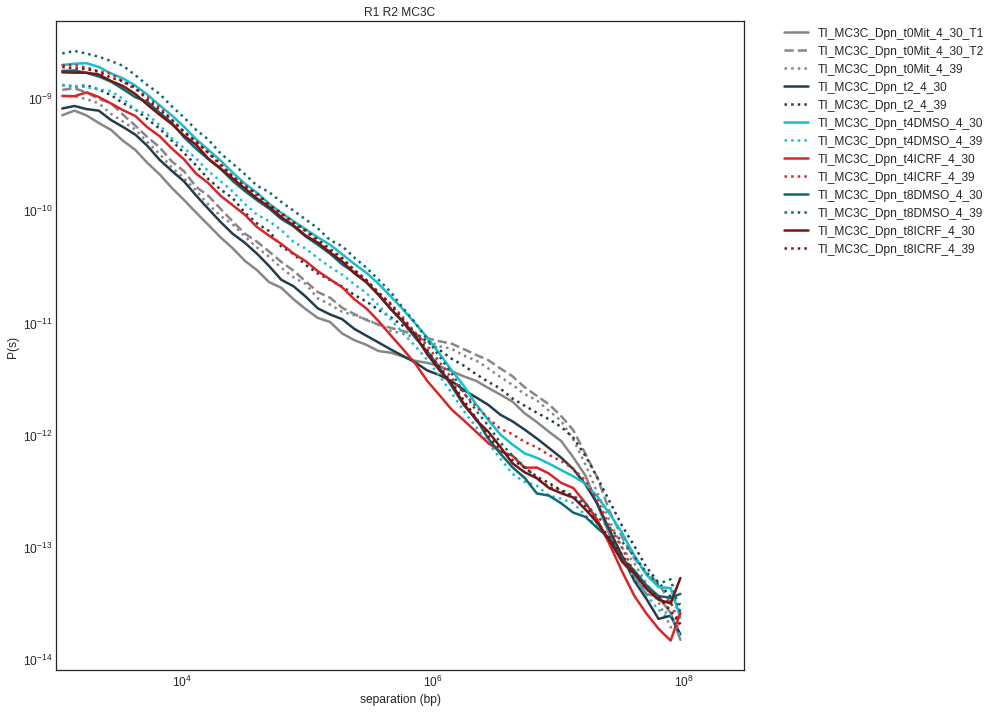

In [17]:
#Scaling plot
fig = plt.figure(figsize=(14, 10))

for cond in conditions:
    dbins = output[cond]['Distbins']
    x = np.sqrt(dbins[:-1] * dbins[1:])
    y = output[cond]['Average']
    plt.plot(x[0:], y, label = cond, lw = 2.5, color = sampleColors[cond], ls = sampleLineStyles[cond])


ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel("P(s)")
plt.xlabel("separation (bp)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1, prop = {'size':12})
plt.title('R1 R2 MC3C')

#fixing ticks
locmajx = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajx)
locmajy = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajy)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locminy = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

#set font sizes
for item in (ax.get_xticklabels() + 
             ax.get_yticklabels()):
    item.set_fontsize(12)
        
for item in ([ax.xaxis.label, ax.yaxis.label, ax.title]):
    item.set_fontsize(12)

plt.xlim(1e3, 3e8)
#plt.ylim(1e-12, 1e-6)
plt.tight_layout()

fname = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures/210111_R1R2_MR_ScalingPlot.png"

plt.savefig(fname, dpi = 300, bbox_inches = "tight")

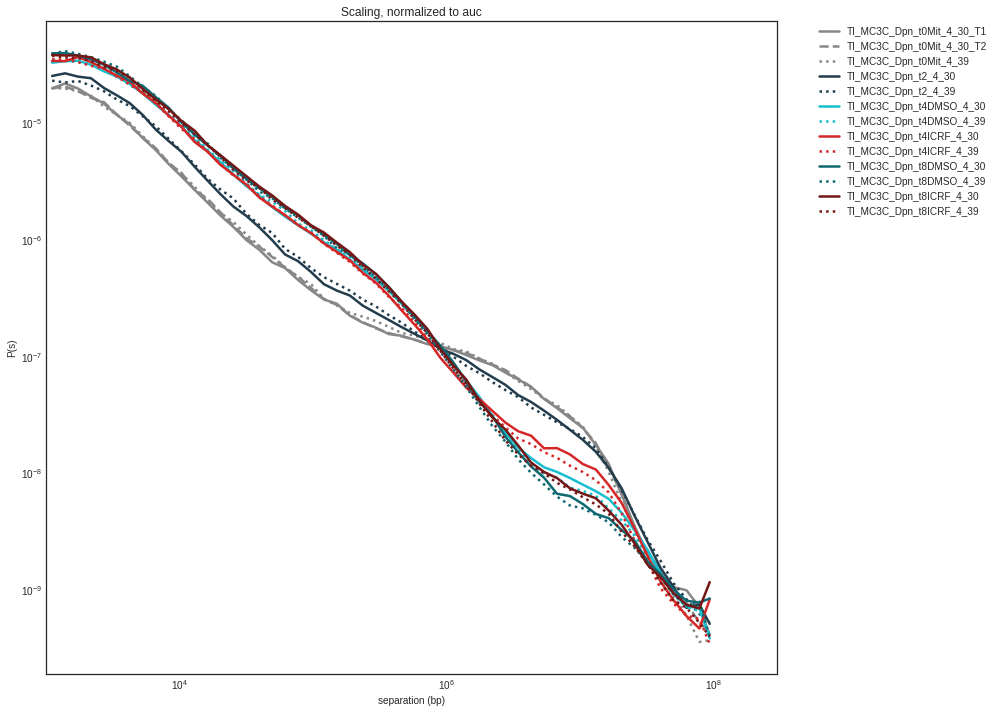

In [18]:
#normalized by auc
#scaling plot
fig = plt.figure(figsize=(14, 10))

for cond in conditions:
    dbins = np.array(output[cond]['Distbins'], dtype = np.float)
    x = np.sqrt(dbins[:-1] * dbins[1:])
    y = output[cond]['Average']
    yfill = np.nan_to_num(y)
    auc = np.trapz(x, yfill)
    plt.plot(x[0:], y/-auc, label = cond, lw = 2.5, color = sampleColors[cond], ls = sampleLineStyles[cond])


ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel("P(s)")
plt.xlabel("separation (bp)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)
plt.title('Scaling, normalized to auc')

#fixing ticks
locmajx = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajx)
locmajy = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajy)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locminy = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.xlim(1e3, 3e8)
#plt.ylim(1e-12, 1e-6)
plt.tight_layout()

fname = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures/210111_R1R2_MR_ScalingPlot_Normalized.png"

plt.savefig(fname, dpi = 300, bbox_inches = "tight")

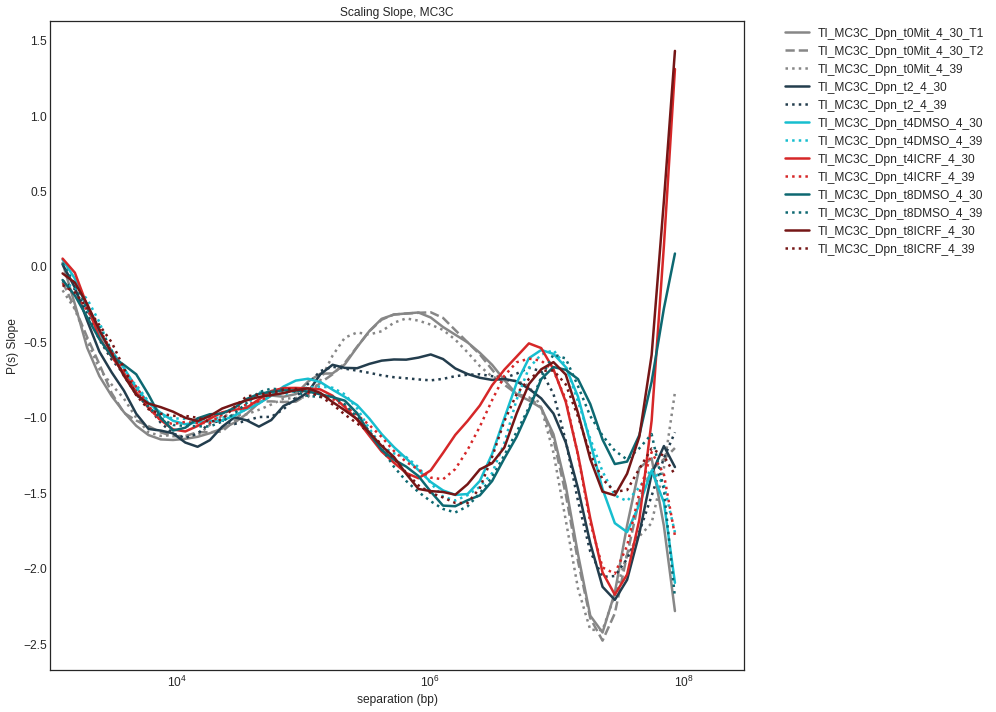

In [19]:
#derivative plot

fig = plt.figure(figsize=(14, 10))

for cond in conditions:
    dbins = output[cond]['Distbins']
    x = np.sqrt(dbins[:-1] * dbins[1:])
    y = output[cond]['Average']
    dydx = diff(np.log(y))/diff(np.log(x))
    dx = np.sqrt(x[:-1] * x[1:])
    plt.plot(dx, scipy.ndimage.filters.gaussian_filter1d(dydx, 1.2), label = cond, lw = 2.5, color = sampleColors[cond],
            ls = sampleLineStyles[cond])

ax = plt.gca()
ax.set_xscale('log')
plt.ylabel("P(s) Slope")
plt.xlabel("separation (bp)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1, prop = {'size':12})
plt.title('Scaling Slope, MC3C')

#fixing ticks
locmajx = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajx)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

#set font sizes
for item in (ax.get_xticklabels() + 
             ax.get_yticklabels()):
    item.set_fontsize(12)
        
for item in ([ax.xaxis.label, ax.yaxis.label, ax.title]):
    item.set_fontsize(12)

plt.xlim(1e3, 3e8)
#plt.ylim(1e-12, 1e-6)
plt.tight_layout()

fname = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures/210111_R1R2_MR_ScalingPlotSlope.png"

plt.savefig(fname, dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

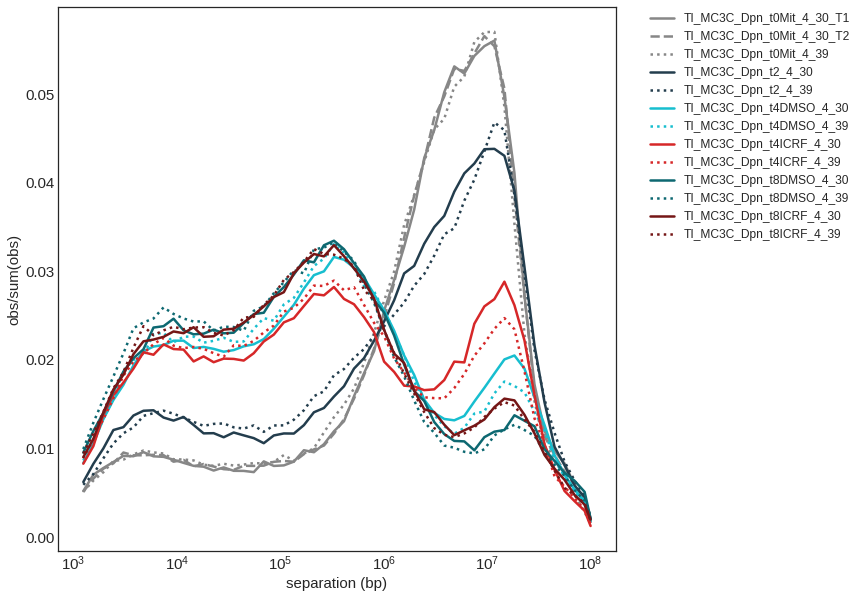

In [20]:
plt.clf()
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 15})

#Density plot

for cond in conditions:
    d = np.sum(list(output_obs[cond].values()), axis=0)
    dsum = np.sum(list(output_obs[cond].values()))
    
    plt.plot(distbins[1:],d/dsum, label = cond, color = sampleColors[cond],
            ls = sampleLineStyles[cond],  linewidth=2.5)

ax = plt.gca()
ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1, prop = {'size':12})
plt.ylabel("obs/sum(obs)")
plt.xlabel("separation (bp)")
fname = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures/210111_R1R2_MR_DensityPlot_FromScaling.png"
plt.savefig(fname, dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

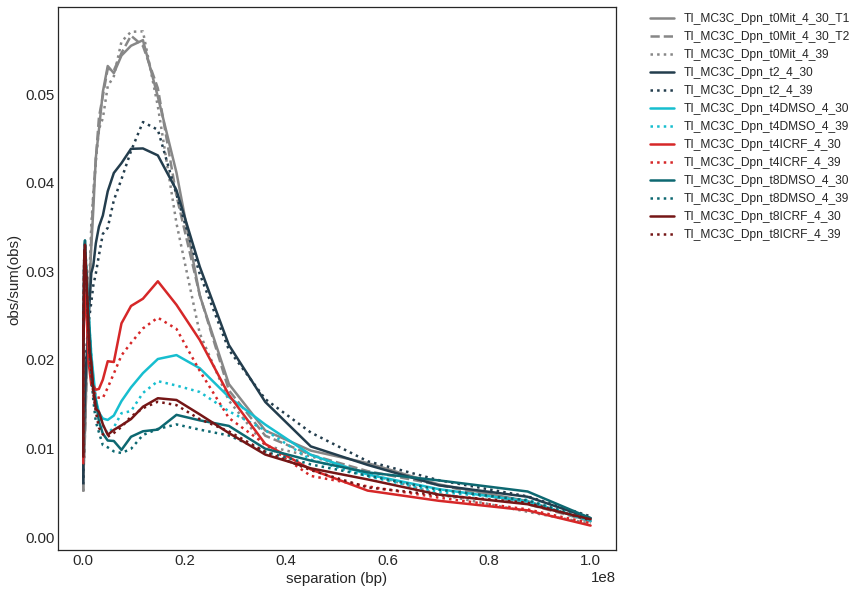

In [21]:
plt.clf()
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 15})

#Density plot

for cond in conditions:
    d = np.sum(list(output_obs[cond].values()), axis=0)
    dsum = np.sum(list(output_obs[cond].values()))
    
    plt.plot(distbins[1:],d/dsum, label = cond, color = sampleColors[cond],
            ls = sampleLineStyles[cond],  linewidth=2.5)

ax = plt.gca()
#ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1, prop = {'size':12})
plt.ylabel("obs/sum(obs)")
plt.xlabel("separation (bp)")
fname = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures/210111_R1R2_MR_DensityPlot_FromScaling_LinearX.png"
plt.savefig(fname, dpi = 300, bbox_inches = "tight")

In [3]:
#Using Bastiaan's data this time
#input_df = pd.read_table("/nl/umw_job_dekker/users/bd44w/DCIC/walks_ns_with_nas.tsv", sep="\t")

/home/eh37w/bin/miniconda3/envs/cooler-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
input_df = pd.read_table("/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/walks/210119_FilipeData_MitoticHelaOnly_direct_ints_processed_walks_stranded.txt", sep="\t")
input_df.head()

,pacbio_frag_ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,size,state,dataset,treatment,biorep,techrep,fully_mapped,dist,inter_chr,direction
0,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr13,52286031,52286762,-,chr13,39525073,39526674,+,100000,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,-12760088.0,False,upstream
1,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr13,39525073,39526674,+,chr13,50147825,50150100,-,100000,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,10623426.0,False,downstream
2,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr15,23927108,23927364,-,chr15,33531761,33532535,-,100070,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,9605171.0,False,downstream
3,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr15,33531761,33532535,-,chr15,33616116,33617058,+,100070,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,84523.0,False,downstream
4,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr15,33616116,33617058,+,chr15,31421522,31422261,-,100070,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,-2194797.0,False,upstream


In [11]:
def direct_cis_interactions(df1):
    df2 = df1[(df1["V1"] != "chrX")] # I always remove X for scaling but this is optional you can include them
    df3 = df2[(df2["V1"] != "chrY")]
    df4 = df3[(df3["V1"] == df3["V5"])]
    return df4

In [12]:
cis_df = direct_cis_interactions(input_df)

In [14]:
cis_df.columns

Index(['pacbio_frag_ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'size', 'state', 'dataset', 'treatment', 'biorep', 'techrep',
       'fully_mapped', 'dist', 'inter_chr', 'direction'],
      dtype='object')

In [15]:
input_df.dataset.unique()

array(['AUG1516_PacBio_MitoticHela_long',
       'AUG1516_PacBio_MitoticHela_short', 'JUL0716_Mitotic_HeLa_long',
       'JUL0716_Mitotic_HeLa_short'], dtype=object)

# Parts of scaling script to run it locally

In [16]:
def bedslice(grouped, chrom, start, end):
	"""Assumes no proper nesting of intervals"""
	chromdf = grouped.get_group(chrom)
	lo = chromdf['end'].values.searchsorted(start, side='right')
	hi = lo + chromdf['start'].values[lo:].searchsorted(end, side='left')
	return chromdf.iloc[lo:hi]


def intlogbins(start, end, N=None, ratio=None):
	
	start = int(start)
	end = int(end)
	if ratio is not None:
		if N is not None:
			raise ValueError("Please specify only N or ratio")
		N = np.log(end / start) / np.log(ratio)
	elif N is None:
		raise ValueError("Please specify either N or ratio")
	bins = np.logspace(np.log10(start), np.log10(end), N)
	bins = np.array(np.rint(bins), dtype=int)
	for i in range(1,len(bins)-1):
		if bins[i]==bins[i-1]:
			bins[i] = bins[i]+1
	assert np.all(bins[1:] > bins[:-1])
	assert bins[0] == start
	assert bins[-1] == end
	return bins


def geomprog(factor, start=1):
	yield start
	while True:
		start *= factor
		yield start


def _geomrange(start, end, factor, endpoint):
	prev = np.nan
	for i in geomprog(factor, start):
		x = int(round(i))
		
		if x > end:
			break

		if x == prev:
			continue
		
		prev = x
		yield x

	if endpoint and prev != end:
		yield end


def geomrange(start, end, factor, endpoint=False):
	return np.fromiter(_geomrange(start, end, factor, endpoint), dtype=int)


def geomspace(start, end, num=50, endpoint=True):
	factor = 1 + ((np.log10(end) - np.log10(start)) / num)
	return geomrange(start, end, factor, endpoint=endpoint)


def _contact_areas(distbins, scaffold_length):
	distbins = distbins.astype(float)
	scaffold_length = float(scaffold_length)
	outer_areas = np.maximum(scaffold_length - distbins[:-1], 0) ** 2
	inner_areas = np.maximum(scaffold_length - distbins[1: ], 0) ** 2
	return 0.5 * (outer_areas - inner_areas)
	

def contact_areas(distbins, region1, region2):
	if region1 == region2:
		start, end = region1
		areas = _contact_areas(distbins, end - start)
	else:
		start1, end1 = region1
		start2, end2 = region2
		if start2 <= start1:
			start1, start2 = start2, start1
			end1, end2 = end2, end1
		areas = (
			_contact_areas(distbins, end2 - start1) -
			_contact_areas(distbins, start2 - start1) -
			_contact_areas(distbins, end2 - end1)
		)
		if end1 < start2:
			areas += _contact_areas(distbins, start2 - end1)
	
	return areas

In [13]:
cis_df.head()

,pacbio_frag_ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,size,state,dataset,treatment,biorep,techrep,fully_mapped,dist,inter_chr,direction
0,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr13,52286031,52286762,-,chr13,39525073,39526674,+,100000,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,-12760088.0,False,upstream
1,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr13,39525073,39526674,+,chr13,50147825,50150100,-,100000,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,10623426.0,False,downstream
2,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr15,23927108,23927364,-,chr15,33531761,33532535,-,100070,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,9605171.0,False,downstream
3,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr15,33531761,33532535,-,chr15,33616116,33617058,+,100070,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,84523.0,False,downstream
4,prometaphase_AUG1516_PacBio_MitoticHela_long_1...,chr15,33616116,33617058,+,chr15,31421522,31422261,-,100070,long,prometaphase,AUG1516_PacBio_MitoticHela_long,t0Mit,R2,T1,True,-2194797.0,False,upstream


In [22]:
def scaling_on_go(input_df):
    chromosomes=list(chr_sizes.index[:-3])
    
    input_df["pos1"] = ((input_df["V2"] + input_df["V3"]) /2).astype("int32")
    input_df["pos2"] = ((input_df["V6"] + input_df["V7"]) /2).astype("int32")
    df = input_df.rename(columns={"V1" : 'chrom1', 'V5' : 'chrom2'})
    
    chrom_out = {}
    chrom_obs = {}

    for chrom in chromosomes:
    
        start = 0
        end = chr_sizes.loc[chrom].values[0]

        region1 = (start, end)
        region2 = region1

        df1 = df[df["chrom1"] == chrom]

        df1 = df1[ 
            (df1['pos1'] >= region1[0]) & 
            (df1['pos1'] < region1[1]) & 
            (df1['pos2'] >= region2[0]) & 
            (df1['pos2'] < region2[1])
        ]
        dists = abs(df1['pos2'] - df1['pos1']).values

        obs, _ = np.histogram(
            dists[(dists >= 1000) & (dists < 100000000)],
            bins=distbins)

        area = contact_areas(distbins, region1, region2)

        chrom_out[chrom] = obs/area
        chrom_obs[chrom] = obs
    chrom_out["Average"] = np.nanmean(list(chrom_out.values()), axis=0)
    chrom_out["Distbins"] = distbins


        
    return chrom_out, chrom_obs

In [18]:
chr_sizes = pd.read_table("/nl/umw_job_dekker/cshare/reference/sorted_chromsizes/hg19.reduced.chrom.sizes", header=None, index_col=0)
distbins = geomspace(1000, 100000000, 20)

In [19]:
conditions = [
    'JUL0716_Mitotic_HeLa_long',
    'JUL0716_Mitotic_HeLa_short',
    'AUG1516_PacBio_MitoticHela_long',
    'AUG1516_PacBio_MitoticHela_short'
]

In [23]:
cis_df_dict = {}
for cond in conditions:
    cis_df_dict[cond] = cis_df[cis_df['dataset'] == cond]

In [24]:
output = {}
output_obs = {}

for cond in conditions:
    output[cond], output_obs[cond] = scaling_on_go(cis_df_dict[cond])

/home/eh37w/bin/miniconda3/envs/cooler-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/eh37w/bin/miniconda3/envs/cooler-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/eh37w/bin/miniconda3/envs/cooler-env/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


In [25]:
sampleColors = {
    'JUL0716_Mitotic_HeLa_long': '#233D4D',
    'JUL0716_Mitotic_HeLa_short': '#17becf',
    'AUG1516_PacBio_MitoticHela_long': '#d62728',   
    'AUG1516_PacBio_MitoticHela_short': '#0D6871'
}

sampleLineStyles = {
    'JUL0716_Mitotic_HeLa_long' : '-', 
    'JUL0716_Mitotic_HeLa_short': '-', 
    'AUG1516_PacBio_MitoticHela_long': '-', 
    'AUG1516_PacBio_MitoticHela_short': '-'
}

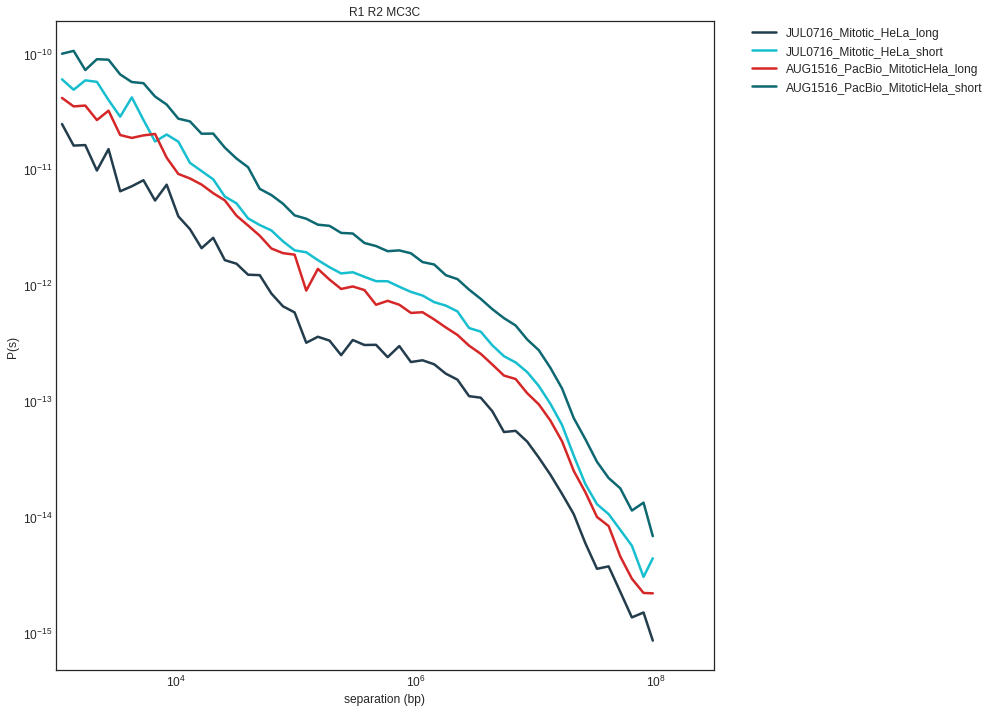

In [26]:
#Scaling plot
fig = plt.figure(figsize=(14, 10))

for cond in conditions:
    dbins = output[cond]['Distbins']
    x = np.sqrt(dbins[:-1] * dbins[1:])
    y = output[cond]['Average']
    plt.plot(x[0:], y, label = cond, lw = 2.5, color = sampleColors[cond], ls = sampleLineStyles[cond])


ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel("P(s)")
plt.xlabel("separation (bp)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1, prop = {'size':12})
plt.title('R1 R2 MC3C')

#fixing ticks
locmajx = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajx)
locmajy = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajy)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locminy = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

#set font sizes
for item in (ax.get_xticklabels() + 
             ax.get_yticklabels()):
    item.set_fontsize(12)
        
for item in ([ax.xaxis.label, ax.yaxis.label, ax.title]):
    item.set_fontsize(12)

plt.xlim(1e3, 3e8)
#plt.ylim(1e-12, 1e-6)
plt.tight_layout()

fname = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures/210120_BDMitoticData_R1R2_ScalingPlot.png"

plt.savefig(fname, dpi = 300, bbox_inches = "tight")

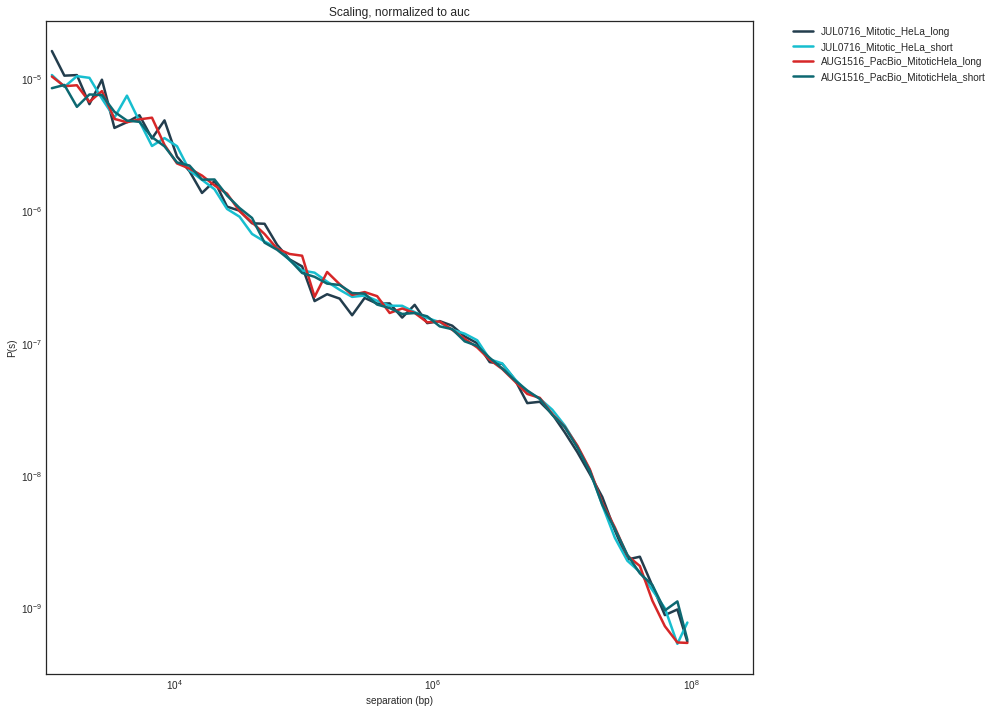

In [27]:
#normalized by auc
#scaling plot
fig = plt.figure(figsize=(14, 10))

for cond in conditions:
    dbins = np.array(output[cond]['Distbins'], dtype = np.float)
    x = np.sqrt(dbins[:-1] * dbins[1:])
    y = output[cond]['Average']
    yfill = np.nan_to_num(y)
    auc = np.trapz(x, yfill)
    plt.plot(x[0:], y/-auc, label = cond, lw = 2.5, color = sampleColors[cond], ls = sampleLineStyles[cond])


ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel("P(s)")
plt.xlabel("separation (bp)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)
plt.title('Scaling, normalized to auc')

#fixing ticks
locmajx = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajx)
locmajy = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajy)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locminy = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.xlim(1e3, 3e8)
#plt.ylim(1e-12, 1e-6)
plt.tight_layout()

fname = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures/210120_BDMitoticData_R1R2_ScalingPlot_Normalized.png"

plt.savefig(fname, dpi = 300, bbox_inches = "tight")

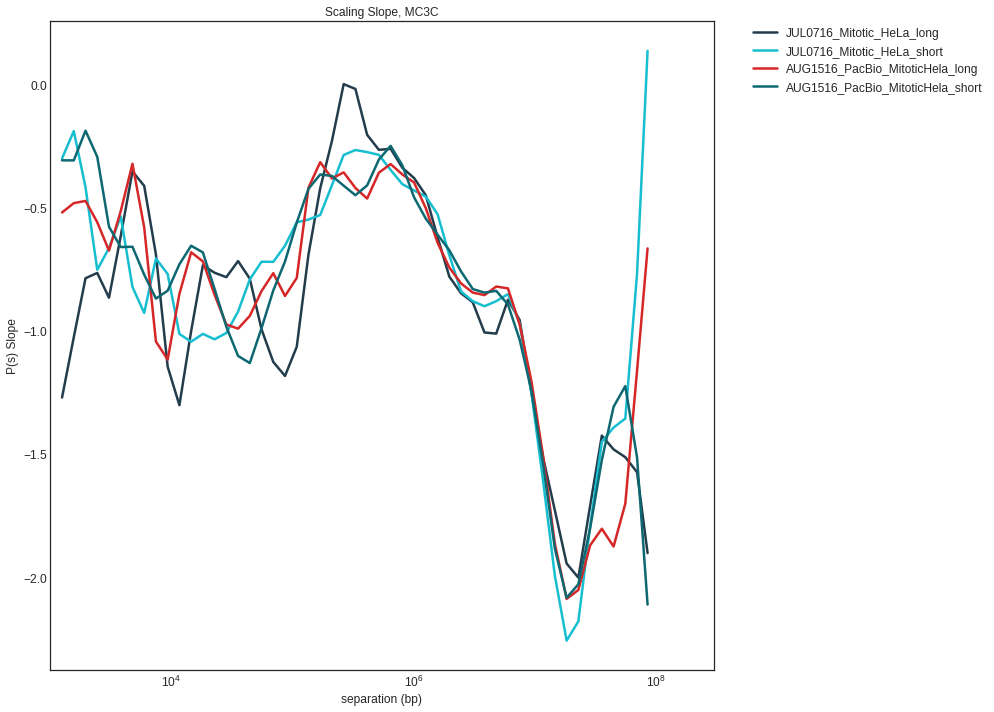

In [28]:
#derivative plot

fig = plt.figure(figsize=(14, 10))

for cond in conditions:
    dbins = output[cond]['Distbins']
    x = np.sqrt(dbins[:-1] * dbins[1:])
    y = output[cond]['Average']
    dydx = diff(np.log(y))/diff(np.log(x))
    dx = np.sqrt(x[:-1] * x[1:])
    plt.plot(dx, scipy.ndimage.filters.gaussian_filter1d(dydx, 1.2), label = cond, lw = 2.5, color = sampleColors[cond],
            ls = sampleLineStyles[cond])

ax = plt.gca()
ax.set_xscale('log')
plt.ylabel("P(s) Slope")
plt.xlabel("separation (bp)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1, prop = {'size':12})
plt.title('Scaling Slope, MC3C')

#fixing ticks
locmajx = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajx)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

#set font sizes
for item in (ax.get_xticklabels() + 
             ax.get_yticklabels()):
    item.set_fontsize(12)
        
for item in ([ax.xaxis.label, ax.yaxis.label, ax.title]):
    item.set_fontsize(12)

plt.xlim(1e3, 3e8)
#plt.ylim(1e-12, 1e-6)
plt.tight_layout()

fname = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures/210120_BDMitoticData_R1R2_ScalingPlotSlope.png"

plt.savefig(fname, dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

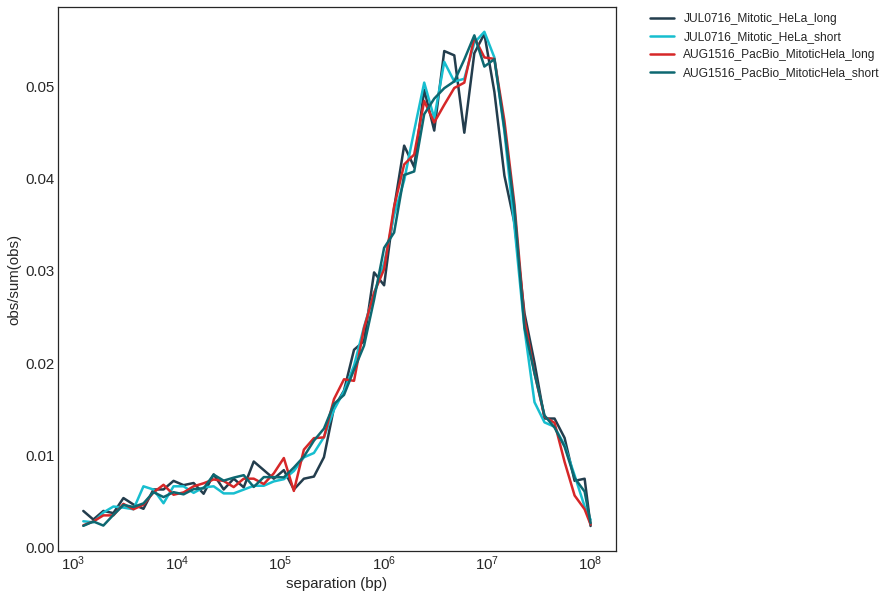

In [29]:
plt.clf()
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 15})

#Density plot

for cond in conditions:
    d = np.sum(list(output_obs[cond].values()), axis=0)
    dsum = np.sum(list(output_obs[cond].values()))
    
    plt.plot(distbins[1:],d/dsum, label = cond, color = sampleColors[cond],
            ls = sampleLineStyles[cond],  linewidth=2.5)

ax = plt.gca()
ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1, prop = {'size':12})
plt.ylabel("obs/sum(obs)")
plt.xlabel("separation (bp)")
fname = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/figures/210120_BDMitoticData_R1R2_DensityPlot_FromScaling.png"
plt.savefig(fname, dpi = 300, bbox_inches = "tight")